In [19]:
from math import sqrt, pi, log, atan, exp
import scipy.integrate
import numpy as np

def w_Vac(q,T,mu_x,m):
    return -T*log( 1 - exp( (mu_x - sqrt(m**2 + q**2))/T ) )

def Pressure_Exci(T,mu_x,m,d_x):
    return d_x *(4*pi/(2*pi)**3) * scipy.integrate.quad(lambda q: q**2 * w_Vac(q,T,mu_x,m), 0, np.inf)[0]



In [14]:
a = np.arange(1, 500, 10)
PressPion=[]
PressDiquark=[]
for i in a:
    p1 = Pressure_Exci(i,0,140,3) - Pressure_Exci(0.1,0,140,3)
    p2 = Pressure_Exci(i,0,600,3) - Pressure_Exci(0.1,0,600,3)
    PressPion.append(p1)
    PressDiquark.append(p2)

/tmp/ipykernel_7265/1073796495.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return d_x *(4*pi/(2*pi)**3) * scipy.integrate.quad(lambda q: q**2 * w_Vac(q,T,mu_x,m), 0, np.inf)[0]


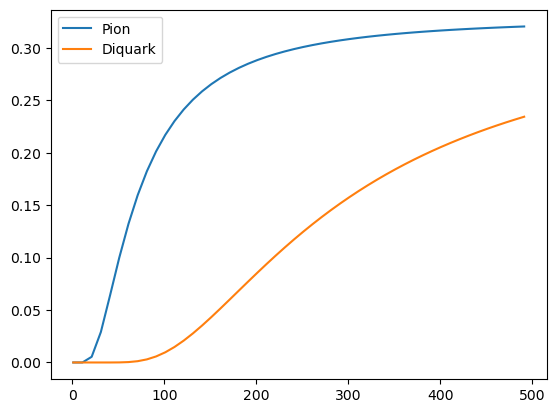

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(a, np.array(PressPion)/a**4)
plt.plot(a, np.array(PressDiquark)/a**4)


plt.legend(['Pion','Diquark']) 

plt.show()

In [37]:
a = np.arange(10, 700, 20, dtype=int)
chi2Cons=[]
chi2=[]
count = 0
for i in a:
    d_mu = 0.01

    s1 = 0.5*( ( Pressure_Exci(i,0,600,3) - 2*Pressure_Exci(i,d_mu,600,3) + Pressure_Exci(i, 2*d_mu,600,3) ) / d_mu**2 ) / i**2
    s2 = 0.5*( ( Pressure_Exci(i,0,600,3) - 2*Pressure_Exci(i,d_mu,600 - 2*(d_mu),3) + Pressure_Exci(i, 2*d_mu,600 - 2*( 2*d_mu),3) ) / d_mu**2 ) / i**2
    chi2.append(s1)
    chi2Cons.append(s2)

/tmp/ipykernel_7265/1073796495.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return d_x *(4*pi/(2*pi)**3) * scipy.integrate.quad(lambda q: q**2 * w_Vac(q,T,mu_x,m), 0, np.inf)[0]


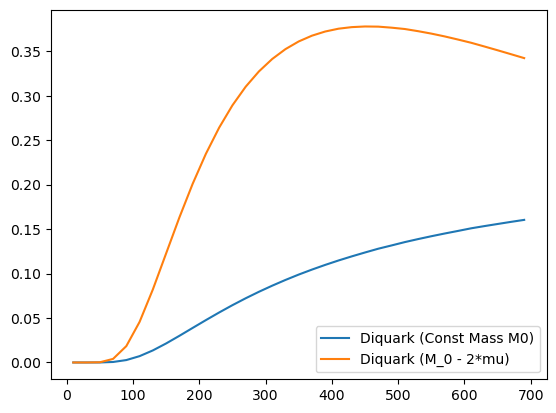

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(a, np.array(chi2))
plt.plot(a, np.array(chi2Cons))


plt.legend(['Diquark (Const Mass M0)','Diquark (M_0 - 2*mu)']) 

plt.show()